In [1]:
import helper as h
from constants import *
from jax import numpy as jnp
from jax.numpy.fft import rfft
import matplotlib.pyplot as plt

from eigenspectrum_plotting_library import image_eig2
import loss_functions as lf

from jax import grad,jit
import jax

# gradient descent

In [2]:
# load and precompute gradients of loss functions
loss_eig = lf.loss_eig_hard_thresh_025_cheb_hann
grad_eig = jit(grad(loss_eig,argnums=0)) 

In [3]:
def loss_coeffs(cheb_tail):
    return (cheb_tail**2).sum()

grad_coeffs = jit(grad(loss_coeffs,argnums=0))

loss_eig :		5.420882225036621
grad_eig norm :		11.100472450256348
loss_coeffs :		0.0
grad_coeffs norm :	0.0
descent rate :		0.000999042415060103
--------------------------------------------------------------------


loss_eig :		4.239573955535889
grad_eig norm :		7.438270568847656
loss_coeffs :		0.0008420425583608449
grad_coeffs norm :	0.012977230362594128
descent rate :		2.0715400751214474e-05
--------------------------------------------------------------------


loss_eig :		4.217971324920654
grad_eig norm :		7.377228260040283
loss_coeffs :		0.0008803003001958132
grad_coeffs norm :	0.013268762268126011
descent rate :		5.610093580799003e-07
--------------------------------------------------------------------


loss_eig :		4.217430114746094
grad_eig norm :		7.375757217407227
loss_coeffs :		0.000881273066624999
grad_coeffs norm :	0.013276091776788235
descent rate :		2.181933744793696e-08
--------------------------------------------------------------------


loss_eig :		4.217418193817139
g

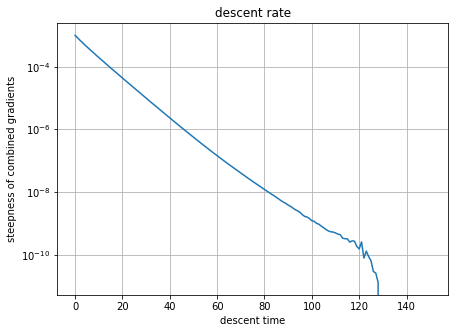


Here are the eigenvalues:


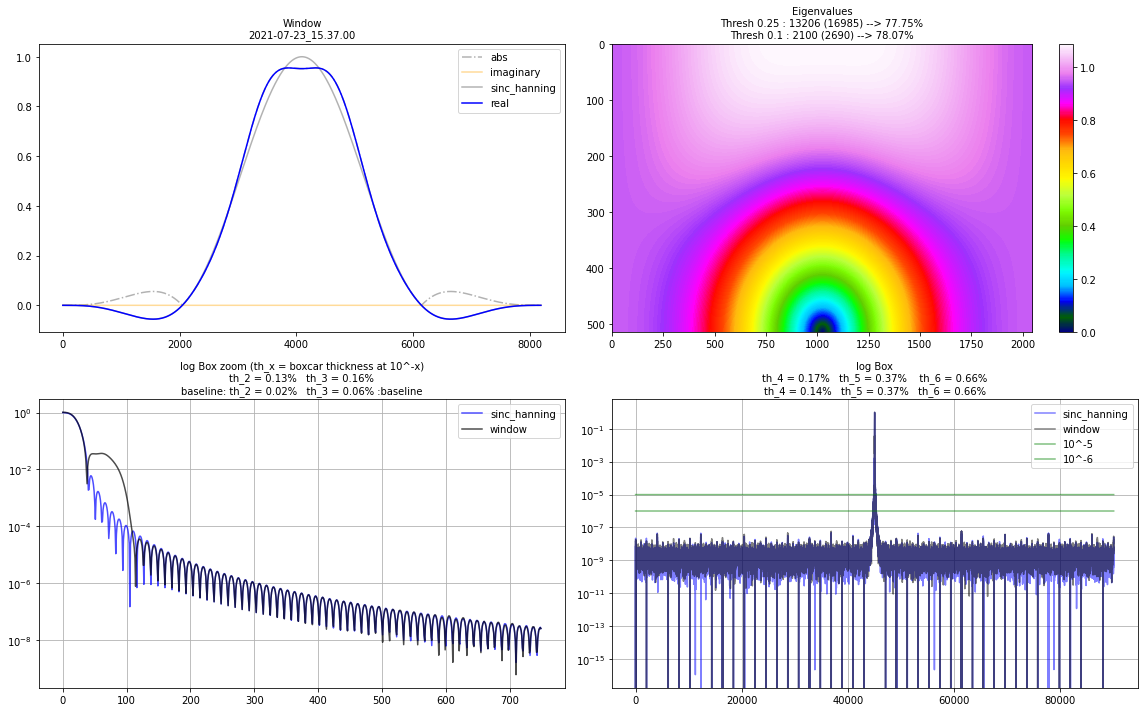


Here are the chebyshev coefficients : 
[ 0.0065466   0.00590435  0.00507942  0.004312    0.00374487  0.00334676
  0.00291873  0.00218418  0.0009235  -0.00090884 -0.0031407  -0.0054358
 -0.00742204 -0.0088357  -0.00961235 -0.00988005 -0.00985662 -0.00970242
 -0.00940458 -0.00875649]


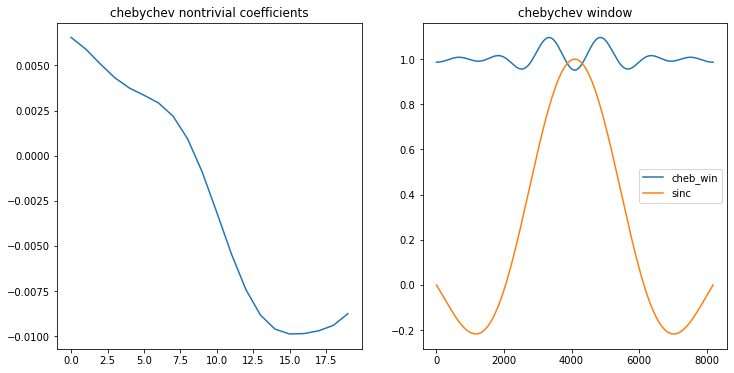

In [25]:
EIG_RATE = 0.0001     # float
COEFFS_RATE = 0.05     # float      

# initialize cheb coeffs to be zero
n_coeffs = 20 
x = jnp.zeros(n_coeffs) 
descent_rate_arr = [] # keeps track of how fast we are descending 

# do gradient descent
for i in range(400): 
    xold = x.copy() # copy the window for keeping track of descent rate

    # descent step 
    x = x - EIG_RATE * grad_eig(x) 
    x = x - COEFFS_RATE * grad_coeffs(x) 

    # update descent rate array
    descent_rate = jnp.sqrt(((xold - x)**2).mean())
    descent_rate_arr.append(descent_rate) 

    # print some stats
    if i%25==0:
        print("loss_eig :\t\t{}".format(loss_eig(xold)))
        print("grad_eig norm :\t\t{}".format(jnp.sqrt((grad_eig(xold)**2).mean())))
        print("loss_coeffs :\t\t{}".format(loss_coeffs(xold)))
        print("grad_coeffs norm :\t{}".format(jnp.sqrt((grad_coeffs(xold)**2).mean())))
        print("descent rate :\t\t{}".format(descent_rate))
        print("----"*17)
        print("\n")
        if descent_rate < 10**(-11):
            print("descent_rate is very slow now, below threshold, stopping descenet")
            break

print("\nFinnished gradient descent\n")


print("\nThis plot is how fast the descent was\n")

# display how fast the descent was
plt.figure(figsize=(7,5))
plt.title("descent rate")
plt.semilogy(descent_rate_arr)
plt.xlabel("descent time") 
plt.ylabel("steepness of combined gradients")
plt.grid(which="both")
plt.show(block=False)
plt.pause(0.05)

print("\nHere are the eigenvalues:")

image_eig2(h.get_modified_sinc_from_cheb(x,win_type="hanning"),win_type="hanning")

print("\nHere are the chebyshev coefficients : \n{}".format(x))

plt.subplots(figsize=(12,6))
plt.subplot(121)
plt.plot(x)
plt.title("chebychev nontrivial coefficients")
plt.subplot(122)
plt.title("chebychev window")
plt.plot(h.cheb_win(x,len(SINC)),label="cheb_win")
plt.plot(SINC,label="sinc")
plt.legend()
plt.show()



# more playing

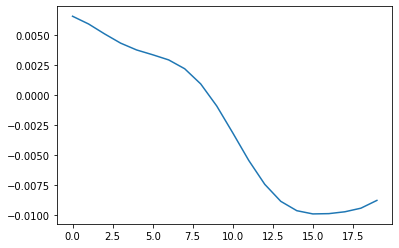

In [26]:
x_old = x.copy()
plt.plot(x_old)


Here are the eigenvalues:


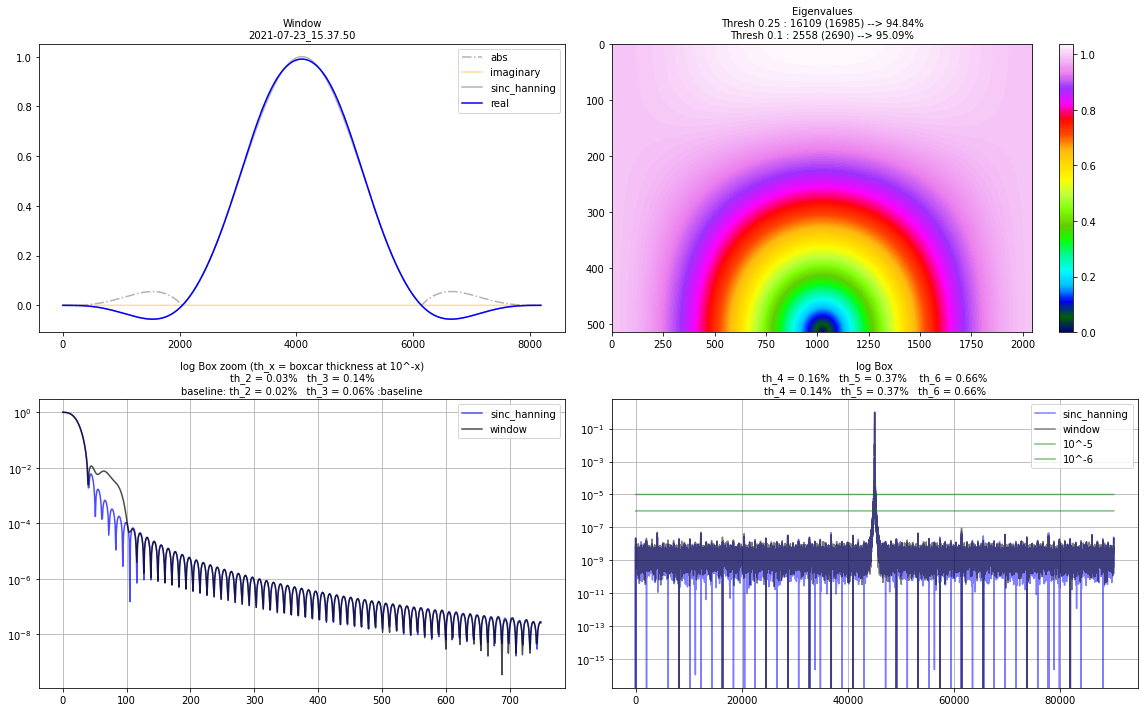


Here are the chebyshev coefficients : 
[ 0.00130932  0.00118087  0.00101588  0.0008624   0.00074897  0.00066935
  0.00058375  0.00043684  0.0001847  -0.00018177 -0.00062814 -0.00108716
 -0.00148441 -0.00176714 -0.00192247 -0.00197601 -0.00197132 -0.00194048
 -0.00188092 -0.0017513 ]


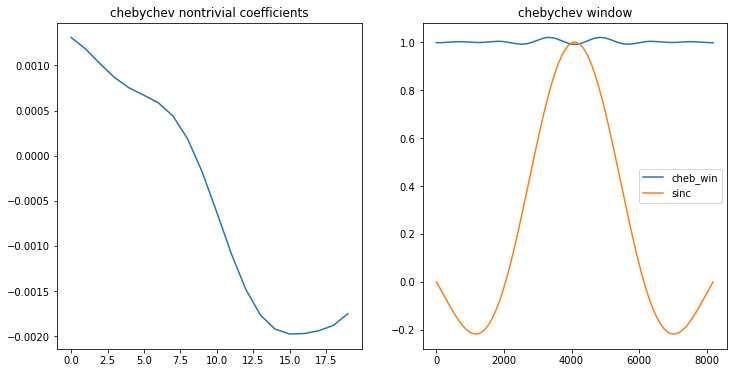

In [28]:
x = x_old.copy() / 5

print("\nHere are the eigenvalues:")

image_eig2(h.get_modified_sinc_from_cheb(x,win_type="hanning"),win_type="hanning")

print("\nHere are the chebyshev coefficients : \n{}".format(x))

plt.subplots(figsize=(12,6))
plt.subplot(121)
plt.plot(x)
plt.title("chebychev nontrivial coefficients")
plt.subplot(122)
plt.title("chebychev window")
plt.plot(h.cheb_win(x,len(SINC)),label="cheb_win")
plt.plot(SINC,label="sinc")
plt.legend()
plt.show()



In [9]:
arr = np.linspace(-1,1,4)
g = np.repeat(np.array([arr]),2,axis=0)
g = list(g)
for idx,array in enumerate(g):
    g[idx] = idx*array
g = np.array(g)
g=np.apply_along_axis(np.cos,0,g)
np.sum(g,axis=0)

DeviceArray([1.5403023, 1.944957 , 1.944957 , 1.5403023], dtype=float32)

In [38]:

np.apply_along_axis(lambda x:x**2,0,g)

DeviceArray([[1.        , 0.11111107, 0.11111113, 1.        ],
             [1.        , 0.11111107, 0.11111113, 1.        ]],            dtype=float32)